Panels A, B, D were output from the Splitpipe code

In [3]:
library(Seurat)
library(tidyverse)
library(viridis)
library(RColorBrewer)
options(stringsAsFactors = FALSE)

source('../scripts/plotting.R')

In [2]:
# unfiltered 40k cell dataset output from Seurat
get_40k_sc_data <- function() {
    load('../processing/seurat/sc_40k.rda')
    seurat_obj <- mb_mt
    return(seurat_obj)
}

# unfiltered 1k cell (with matching long reads) dataset output from Seurat
get_1k_sc_data <- function() {
    load('../processing/seurat/sc_1k.rda')
    seurat_obj <- mb_mt_1k
    return(seurat_obj)
}

# filtered 40k cell dataset output from seurat
get_40k_sc_filt_data <- function() {
    load('../processing/seurat/sc_40k_filt.rda')
    seurat_obj <- mb_mt_filt
    return(seurat_obj)
}

### Panel S2C

pdf 
  2

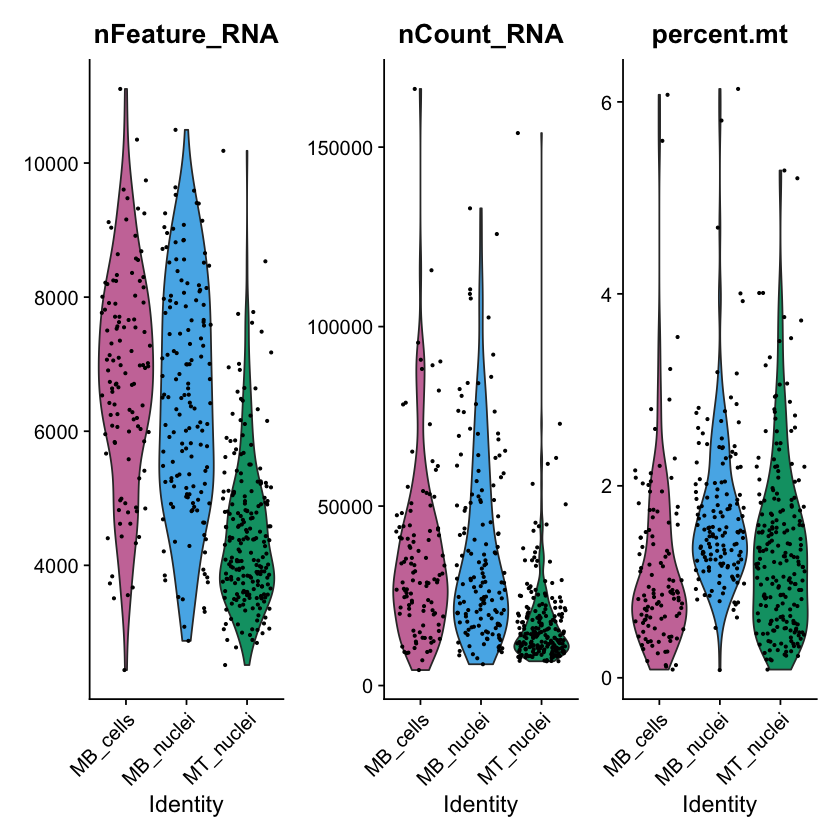

In [8]:
seurat_obj = get_1k_sc_data()
colors = get_sample_colors()

fname = "figures/qc_violinplot_464cells.pdf"
pdf(file = fname,
    width = 6,
    height = 5)
p = VlnPlot(seurat_obj,
        features = c("nFeature_RNA", "nCount_RNA", "percent.mt"),
        group.by = "SampleType",
        pt.size = 0.5,
        ncol = 3,
        cols = colors)
p
dev.off()
p

### Panel S2E

pdf 
  2

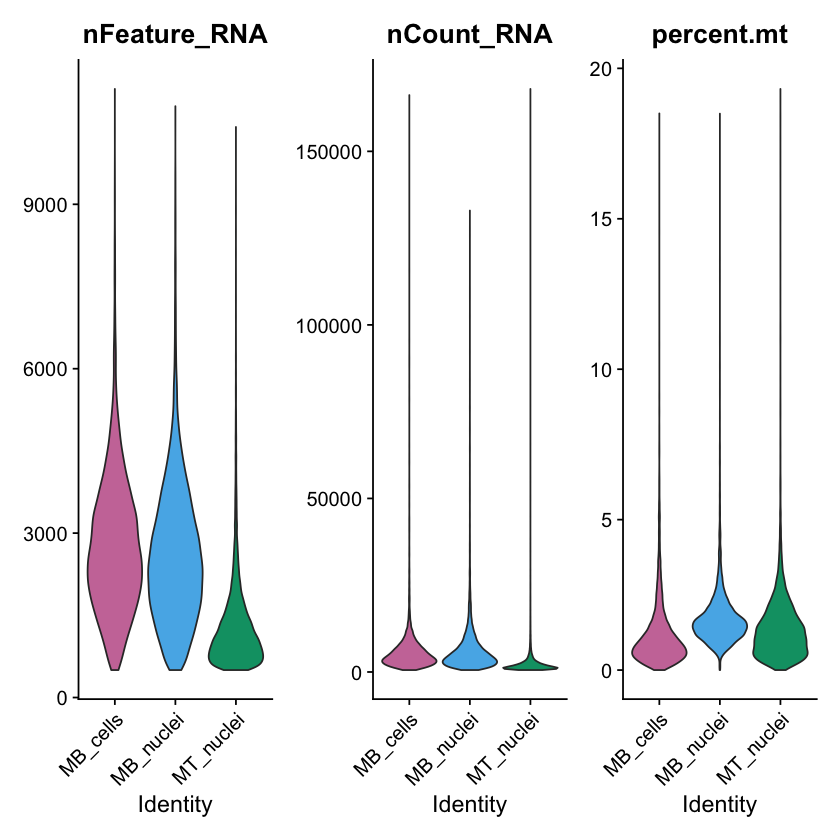

In [4]:
seurat_obj = get_40k_sc_filt_data()
colors = get_sample_colors()

fname = "figures/qc_violinplot_allcells.pdf"
pdf(file = fname,
    width = 6,
    height = 5)
p = VlnPlot(seurat_obj,
            features = c("nFeature_RNA", "nCount_RNA", "percent.mt"),
            group.by = "SampleType",
            pt.size = 0, ncol = 3, cols = colors)
p
dev.off()
p

### Panel S2F

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will rep

pdf 
  2

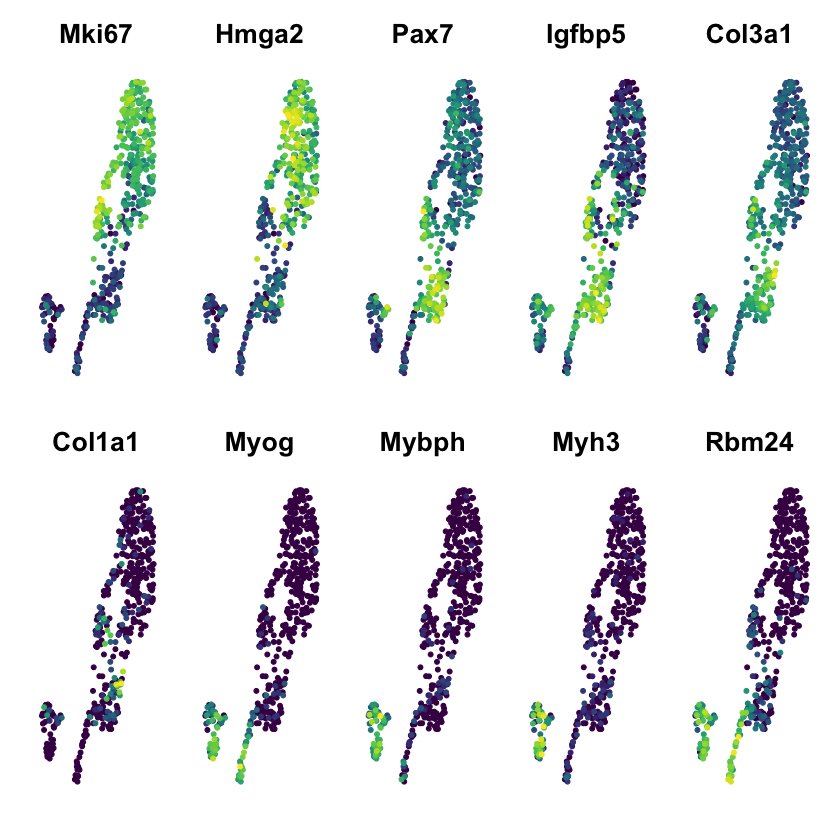

In [3]:
seurat_obj = get_1k_sc_data()

genes = c("Mki67","Hmga2","Pax7","Igfbp5","Col3a1","Col1a1","Myog","Mybph","Myh3","Rbm24")
fname = "figures/464_shortreads_featureplots_ordered.pdf"
pdf(file = fname,
    width = 10, 
    height = 4)
p = FeaturePlot(seurat_obj,
                order=T,
                ncol=5,
                features = genes) & NoLegend() & NoAxes() & 
  scale_colour_gradientn(colours = viridis(11))
p
dev.off()
p

### Panel S2G

pdf 
  2

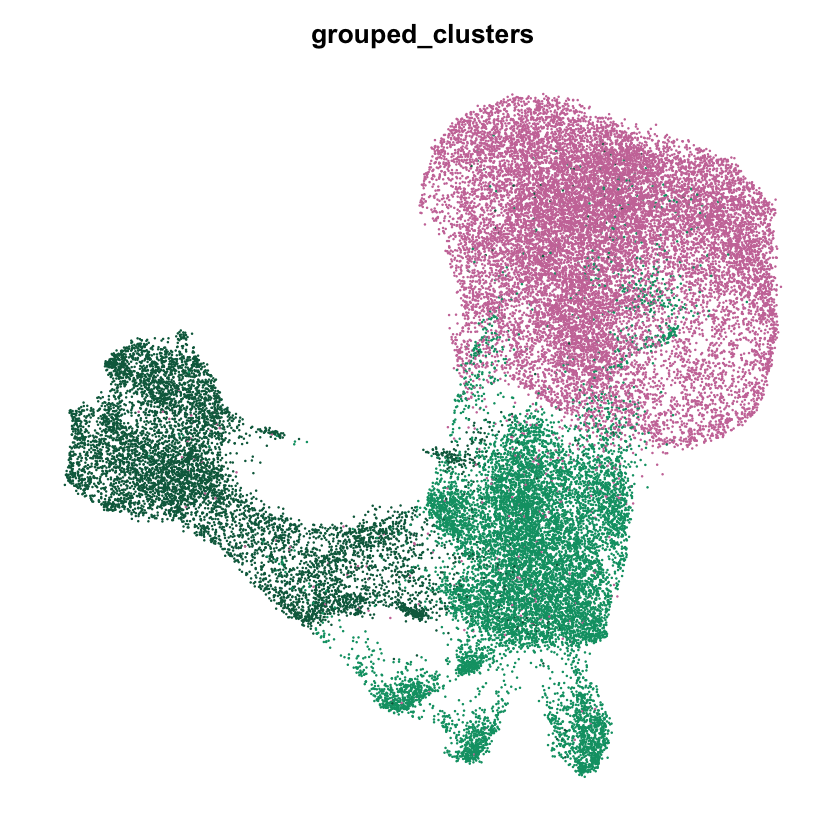

In [4]:
seurat_obj = get_40k_sc_data()
colors = get_celltype_colors()

seurat_obj@meta.data$grouped_clusters  = seurat_obj@meta.data$final_clusters_ordered 
Idents(seurat_obj) = seurat_obj@meta.data$grouped_clusters

seurat_obj=RenameIdents(seurat_obj,
                   '1'='MB', 
                   '2'='MB',
                   '3'='MB',
                   '4'='MB',
                   '5'='MB',
                   '6'='MB',
                   '7'='MB',
                   '8'='MNC',
                   '9'='MNC',
                   '10'='MNC',
                   '11'='MNC',
                   '12'='MNC',
                   '13'='MNC',
                   '14'='MNC',
                   '15'='MNC',
                   '16'='MT',
                   '17'='MT',
                   '18'='MT',
                   '19'='MT',
                   '20'='MT')
seurat_obj@meta.data$grouped_clusters = Idents(seurat_obj)

fname = "figures/shortread_umap_mb_mt_mnc.pdf"
pdf(file = fname,
    width = 5.5, 
    height = 5)
p = DimPlot(
  object = seurat_obj,
  group.by = "grouped_clusters",
  label = F,label.size = 6,
  repel = TRUE)  + NoLegend() + NoAxes()+ scale_color_manual(values = colors)
p
dev.off()
p

### Panel S2H


TRUE 
 464 

pdf 
  2

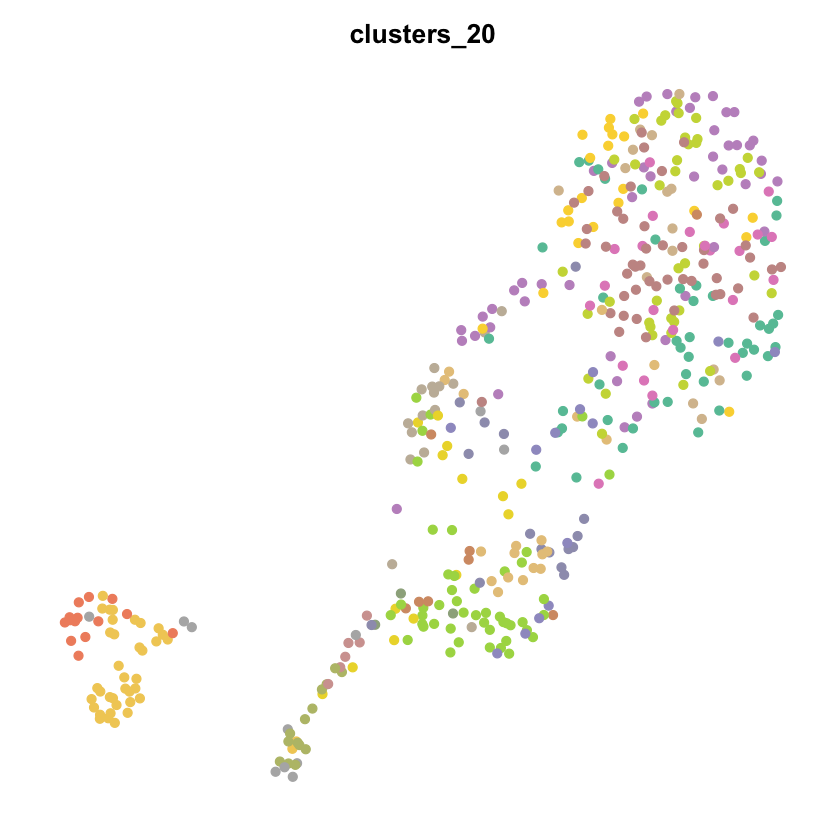

In [6]:
obj_40k = get_40k_sc_data()
obj_1k = get_1k_sc_data()
colors = get_40k_clust_colors()

cellID_clusters  = as.data.frame(obj_40k$final_clusters_ordered)
cellID_clusters$cellID  =sapply(strsplit( sapply(strsplit(rownames(cellID_clusters), ":"), "[[", 2), "_"), "[[", 1)
cellID_clusters$sublib  =sapply(strsplit( sapply(strsplit(rownames(cellID_clusters), ":"), "[[", 2), "_"), "[[", 2)

# Get cell ID and cluster from big object
cellID_clusters_464 = cellID_clusters[cellID_clusters$sublib == "1kx" & cellID_clusters$cellID %in% colnames(obj_1k),]
cellID_clusters_464 = cellID_clusters_464[match(colnames(obj_1k), cellID_clusters_464$cellID),]
table(cellID_clusters_464$cellID == colnames(obj_1k)) # yes

obj_1k$clusters_20 = cellID_clusters_464$`obj_40k$final_clusters_ordered`

fname = "figures/shortread_umap_464cells_20clust.pdf"
pdf(file = fname,
    width = 5.5, 
    height = 5)
p = DimPlot(
  object = obj_1k,pt.size = 2.2,
  group.by = "clusters_20",
  label = F,label.size = 6,
  repel = TRUE)  + NoLegend() + NoAxes()+ scale_color_manual(values = colors)
p
dev.off()
p

### Panel S2I

Finished averaging spliced for cluster 1

Finished averaging spliced for cluster 2

Finished averaging spliced for cluster 3

Finished averaging spliced for cluster 4

Finished averaging spliced for cluster 5

Finished averaging spliced for cluster 6

Finished averaging spliced for cluster 7

Finished averaging spliced for cluster 8

Finished averaging spliced for cluster 9

Finished averaging spliced for cluster 10

Finished averaging spliced for cluster 11

Finished averaging spliced for cluster 12

Finished averaging spliced for cluster 13

Finished averaging spliced for cluster 14

Finished averaging spliced for cluster 15

Finished averaging spliced for cluster 16

Finished averaging spliced for cluster 17

Finished averaging spliced for cluster 18

Finished averaging spliced for cluster 19

Finished averaging spliced for cluster 20

Finished averaging unspliced for cluster 1

Finished averaging unspliced for cluster 2

Finished averaging unspliced for cluster 3

Finished averagin

pdf 
  2

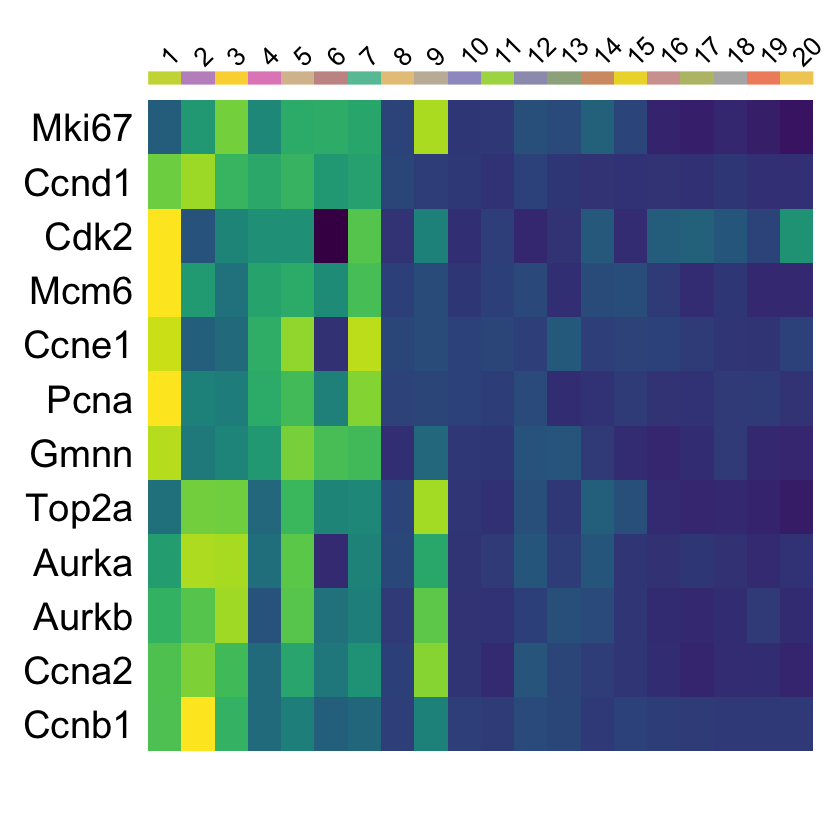

In [5]:
mb_mt = get_40k_sc_data()
colors = get_40k_clust_colors()

Idents(mb_mt) = mb_mt@meta.data$final_clusters_ordered
cluster.averages <- AverageExpression(mb_mt, return.seurat = TRUE)

# G1: Mki67, Ccnd1, Cdk2, Mcm6 
# G1/S: Ccne1 (and a1, a2)
# S: Pcna
# G2: Gmnn
# G2M: Top2a, Aurka, Aurkb, Ccna2 (no a1 expr)
# M: Ccnb1
cycle = c("Mki67","Ccnd1","Cdk2","Mcm6",
          "Ccne1","Pcna","Gmnn","Top2a","Aurka","Aurkb","Ccna2","Ccnb1")

fname = "figures/heatmap_20clusters_cellcycle.pdf"
pdf(file=fname,
    width = 3, 
    height = 2.75)
p = DoHeatmap(cluster.averages, label=T,features = cycle, 
          group.colors = colors, raster=F,draw.lines = FALSE) + 
  scale_fill_viridis() + theme(axis.text.y = element_text(size = 23)) & NoLegend()
p
dev.off()
p

### Panel S2I

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



pdf 
  2

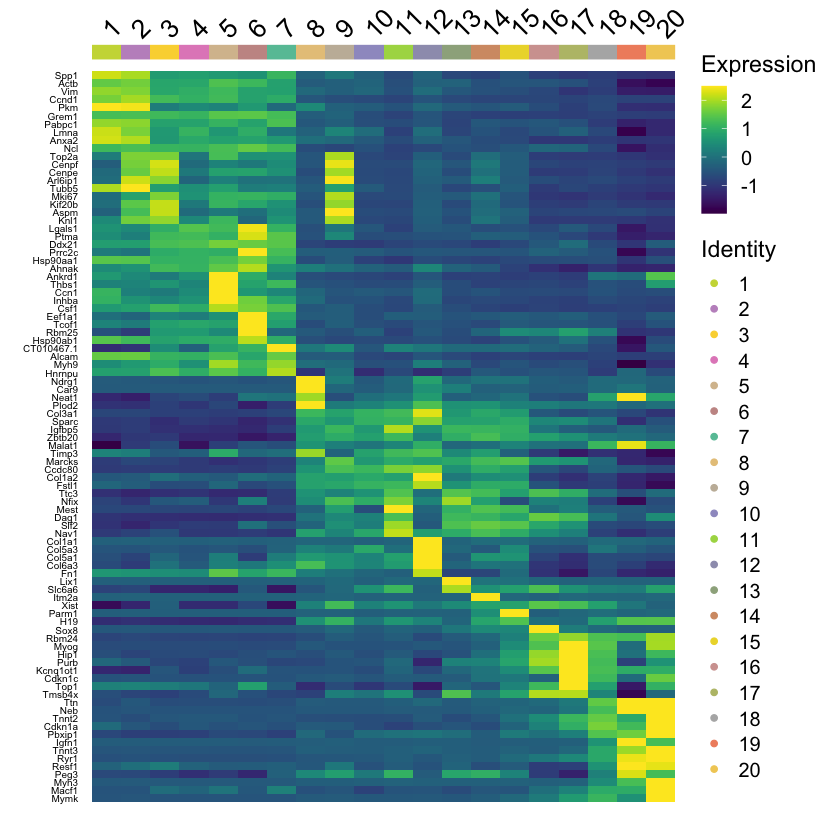

In [9]:
seurat_obj = get_40k_sc_data()

Idents(seurat_obj) = seurat_obj@meta.data$final_clusters_ordered
cluster.averages <- AverageExpression(seurat_obj, return.seurat = TRUE)

seurat_obj.markers <- FindAllMarkers(seurat_obj, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)
seurat_obj.markers = seurat_obj.markers[seurat_obj.markers$p_val_adj < 0.01,] # this is the same df as the marker table in the processing directory

top10 <- seurat_obj.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)


fname = "figures/heatmap_20clusters_top10.pdf"
pdf(file=fname,
    width = 8, 
    height = 9.5)
p = DoHeatmap(cluster.averages, label=T,features = top10$gene, group.colors = colors, raster=F,draw.lines = FALSE) + 
  scale_fill_viridis() + theme(axis.text.y = element_text(size = 6))
p
dev.off()
p